In [49]:
%matplotlib inline
# imported necessary libraries
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import cross_validation



# using the SQLite Table to read data.
con = sqlite3.connect('database.sqlite') 
filtered_data = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 limit 20000
""", con) 

def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'




In [50]:
https://www.kaggle.com/premvardhan/amazon-fine-food-reviews-analysis-naive-bayes

SyntaxError: invalid syntax (<ipython-input-50-5b445483c4ba>, line 1)

In [51]:


#changing reviews with score less than 3 to be positive and vice-versa
actualScore = filtered_data['Score']
positiveNegative = actualScore.map(partition) 
filtered_data['Score'] = positiveNegative


In [52]:
filtered_data.shape #looking at the number of attributes and size of the data
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [53]:
display= pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND UserId="AR5J8UI46CURR"
ORDER BY ProductID
""", con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [54]:


#Sorting data according to ProductId in ascending order
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')



In [55]:
final = sorted_data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(19354, 10)

In [56]:
(final['Id'].size*1.0)/(filtered_data['Id'].size*1.0)*100

96.77

In [57]:
display = pd.read_sql_query("""
SELECT *
FROM Reviews
WHERE Score != 3 AND Id=44737 OR Id=64422
ORDER BY ProductID
""", con)
display

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [58]:


final = final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]



In [59]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(19354, 10)


positive    16339
negative     3015
Name: Score, dtype: int64

In [60]:
import re
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;    

1
Why is this $[...] when the same product is available for $[...] here?<br />http://www.amazon.com/VICTOR-FLY-MAGNET-BAIT-REFILL/dp/B00004RBDY<br /><br />The Victor M380 and M502 traps are unreal, of course -- total fly genocide. Pretty stinky, but only right nearby.


In [61]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'why', 'hasn', 'didn', "mustn't", 'up', 'himself', 'her', 'into', 'who', 'being', 'isn', 'have', 'mightn', 've', 'the', 'd', 'few', 'ain', 'with', "shouldn't", 'yours', 'when', 'ma', 'and', 'does', 'such', 'yourselves', 'then', 'how', 'we', 'itself', 'other', 'between', 'most', 'herself', 'until', 'a', 'down', "wasn't", 'no', 'my', 'you', 'against', 'than', "haven't", 'can', 'them', "should've", 'only', 'needn', 'he', 'of', 'an', 'through', 'here', "it's", 'his', 'their', 'should', 'shan', 'they', 'doing', "won't", 'what', 'over', 'below', 'not', 'this', 'these', 'its', 'shouldn', "you'll", 'to', 'myself', 'had', 'just', 'weren', "aren't", 'aren', 'was', "doesn't", "shan't", 'y', 'wouldn', 'each', 'for', 'during', 're', 'wasn', 'nor', "you're", 'any', 'couldn', 'whom', "wouldn't", 'after', 'some', 'above', 't', 'themselves', 'don', 'from', 'won', 'been', 'll', 'i', 'are', 'own', 'but', 'me', 'your', 'do', 'once', 'there', 'yourself', 'same', 'further', 'theirs', 'him', "you'd", 'in', 

In [62]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase
# this code takes a while to run as it needs to run on 500k sentences.
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [63]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 

In [64]:
final.head(3) #below the processed review can be seen in the CleanedText Column 


# store final table into an SQlLite table for future.
conn = sqlite3.connect('final.sqlite')
c=conn.cursor()
conn.text_factory = str
final.to_sql('Reviews', conn, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

In [65]:
con = sqlite3.connect("final.sqlite")
cleaned_data = pd.read_sql_query("select * from Reviews", con)

In [66]:
cleaned_data.shape

(19354, 12)

In [67]:
cleaned_data.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,2547,2775,B00002NCJC,A13RRPGE79XFFH,reader48,0,0,positive,1281052800,Flies Begone,We have used the Victor fly bait for 3 seasons...,b'use victor fli bait season cant beat great p...
1,2546,2774,B00002NCJC,A196AJHU9EASJN,Alex Chaffee,0,0,positive,1282953600,thirty bucks?,Why is this $[...] when the same product is av...,b'product avail www amazon com victor trap unr...
2,1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,961718400,Great Product,This was a really good idea and the final prod...,b'realli good idea final product outstand use ...
3,1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,962236800,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,b'receiv shipment could hard wait tri product ...
4,8696,9527,B00005V3DC,A8KY7S48EW7LW,"A. Daly ""AD""",0,0,positive,1350172800,The Best Cleansing Tea I've Ever Had,I've used this brand for years. If you're feel...,b'ive use brand year your feel clog ate massiv...


In [68]:
cleaned_data["Score"].value_counts()

positive    16339
negative     3015
Name: Score, dtype: int64

In [69]:
# To randomly sample 100k points from both class

data_pos = cleaned_data[cleaned_data["Score"] == "positive"].sample(n =4000)
data_neg = cleaned_data[cleaned_data["Score"] == "negative"].sample(n = 3000)
final_100k = pd.concat([data_pos, data_neg])
final_100k.shape

(7000, 12)

In [70]:
final_100k["Time"] = pd.to_datetime(final_100k["Time"], unit = "s")
final_100k = final_100k.sort_values(by = "Time")
final_100k.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
2,1146,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,2000-06-23,Great Product,This was a really good idea and the final prod...,b'realli good idea final product outstand use ...
599,17537,19119,B0001LVX4K,A2BURMCEXHSA0C,Chris Leggett,15,15,positive,2004-06-15,Cheese sandwiches are naked without Branston P...,This is the best sandwich topping ever! I gre...,b'best sandwich top ever grew eat branston pic...
90,17952,19565,B000084ETV,A1RADTHXONQYP0,"S. L. Jordan ""suncloud27""",55,57,positive,2004-07-23,CANIDAE - a best choice for Fido or FiFi,I searched for a food that wasn't full of pres...,b'search food wasnt full preserv filler didnt ...
15,5897,6386,B000084EK9,A1Z54EM24Y40LL,c2,0,0,negative,2004-07-28,This stuff is bad!,I honestly have to say that I just won't buy t...,b'honest say wont buy varieti look bad smell b...
19,5888,6376,B000084EKD,A1Z54EM24Y40LL,c2,1,1,negative,2004-07-28,Needs improved,I haven't had a cat yet that liked this one. ...,b'havent cat yet like one littl interest think...


In [71]:
# Fuction to compute alpha value
def naive_bayes(X_train, y_train):
    
    alpha_values = np.arange(1, 500, 0.5)
        

    # empty list that will hold cv scores
    cv_scores = []

    # perform 10-fold cross validation
    for alpha in alpha_values:
        mnb = MultinomialNB(alpha = alpha)
        scores = cross_val_score(mnb, X_train, y_train, cv = 10, scoring = 'accuracy')
        cv_scores.append(scores.mean())

    # changing to misclassification error
    MSE = [1 - x for x in cv_scores]

    # determining best alpha
    optimal_alpha = alpha_values[MSE.index(min(MSE))]
    print('\nThe optimal number of alpha is %d.' % optimal_alpha)

    # plot misclassification error vs alpha
    plt.plot(alpha_values, MSE, marker = '*') 

    #for xy in zip(alpha_values, np.round(MSE,3)):
        #plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification Error vs alpha")
    plt.xlabel('value of alpha')
    plt.ylabel('Misclassification Error')
    plt.show()

    #print("the misclassification error for each value of alpha is : ", np.round(MSE,3))
    return optimal_alpha

In [72]:
# 100k data which will use to train model after vectorization
X = final_100k["CleanedText"]
print("shape of X:", X.shape)

shape of X: (7000,)


In [73]:
# class label
y = final_100k["Score"]
print("shape of y:", y.shape)

shape of y: (7000,)


In [74]:
# split data into train and test where 70% data used to train model and 30% for test
# final_4000[:int(len(final_4000) * 0.75)], final_4000[int(len(final_4000) * 0.75):]
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, y_train.shape, x_test.shape)

(4900,) (4900,) (2100,)


In [75]:
# Train Vectorizor
from sklearn.feature_extraction.text import CountVectorizer 

bow = CountVectorizer()
X_train = bow.fit_transform(X_train)



In [76]:
# Test Vectorizor
x_test = bow.transform(x_test)

In [165]:
x_test.shape


(70, 1009)

In [77]:
X_train.shape

(4900, 9201)

In [78]:
y_train.shape

(4900,)


The optimal number of alpha is 1.


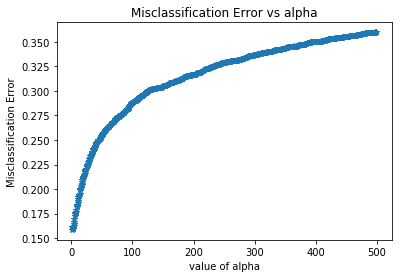

1.5

In [79]:
# To choose optimal_alpha using cross validation

optimal_alpha_bow = naive_bayes(X_train, y_train)
optimal_alpha_bow


In [80]:
# instantiate learning model alpha = optimal_alpha
nb_optimal =  MultinomialNB(alpha = optimal_alpha_bow)

# fitting the model
nb_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = nb_optimal.predict(x_test)

In [81]:
bow_features = bow.get_feature_names()

In [82]:
# To count feature for each class while fitting the model
# Number of samples encountered for each (class, feature) during fitting

feat_count = nb_optimal.feature_count_
feat_count.shape

(2, 9201)

In [83]:
# Empirical log probability of features given a class(i.e. P(x_i|y))

log_prob = nb_optimal.feature_log_prob_
log_prob

array([[-11.11961124, -10.60878561, -10.27231337, ..., -10.60878561,
        -10.60878561, -11.11961124],
       [-10.73370174, -11.24452737, -10.73370174, ...,  -9.29861722,
        -11.24452737, -10.73370174]])

In [84]:
feature_prob = pd.DataFrame(log_prob, columns = bow_features)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape

(9201, 2)

In [85]:
# To show top 10 feature from both class
# Feature Importance
print("Top 10 Negative Features:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])
print("\n\n Top 10 Positive Features:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])

Top 10 Negative Features:-
 tast      -4.486731
like      -4.487609
product   -4.602925
one       -4.923167
flavor    -5.000780
would     -5.014074
tri       -5.018545
food      -5.201614
use       -5.232582
buy       -5.255034
Name: 0, dtype: float64


 Top 10 Positive Features:-
 like     -4.496550
tast     -4.669452
love     -4.696786
good     -4.756843
great    -4.771151
flavor   -4.784623
coffe    -4.866101
one      -4.907702
use      -4.966006
tri      -5.005552
Name: 1, dtype: float64


In [86]:
# Accuracy on train data
train_acc_bow = nb_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_bow)

Train accuracy 0.9163265306122449


In [87]:
# Error on train data
train_err_bow = 1-train_acc_bow
print("Train Error %f%%" % (train_err_bow))

Train Error 0.083673%


In [88]:
# evaluate accuracy on test data
acc_bow = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the naive bayes classifier for alpha = %d is %f%%' % (optimal_alpha_bow, acc_bow))


The accuracy of the naive bayes classifier for alpha = 1 is 83.809524%


In [89]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 688,  211],
       [ 129, 1072]])

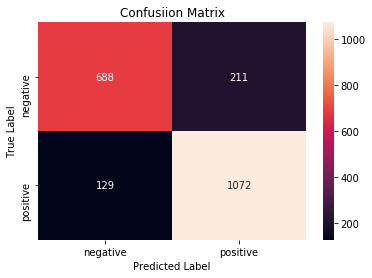

In [90]:
# plot confusion matrix to describe the performance of classifier.
import seaborn as sns
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [91]:
# To show main classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

   negative       0.84      0.77      0.80       899
   positive       0.84      0.89      0.86      1201

avg / total       0.84      0.84      0.84      2100



In [92]:
# data
X = final_100k["CleanedText"]

In [93]:


# Target/class-label
y = final_100k["Score"]



In [94]:


# Split data
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, x_test.shape, y_train.shape, y_test.shape)



(4900,) (2100,) (4900,) (2100,)


In [95]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer()
#tfidf_data = tfidf.fit_transform(final_4000["CleanedText"])
#tfidf_data


#tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
#tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
#tf_idf_vect= TfidfVectorizer(ngram_range=(1,2))

#tf_idf_vect=dfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
#features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()

#X_train = tf_idf_vect.fit_transform(X_train)
#X_Train=CountVectorizer(ngram_range=(1,2) )
#y_train.shape


from sklearn.feature_extraction.text import TfidfVectorizer

#tfidf = TfidfVectorizer()
#tfidf_data = tfidf.fit_transform(final_4000["CleanedText"])
#tfidf_data
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
X_train = tf_idf_vect.fit_transform(X_train)
X_train

/home/dtewani/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


<4900x132201 sparse matrix of type '<class 'numpy.float64'>'
	with 333840 stored elements in Compressed Sparse Row format>

In [96]:
# Convert test text data to its vectorizor
x_test = tf_idf_vect.transform(x_test)
x_test.shape

(2100, 132201)


The optimal number of alpha is 1.


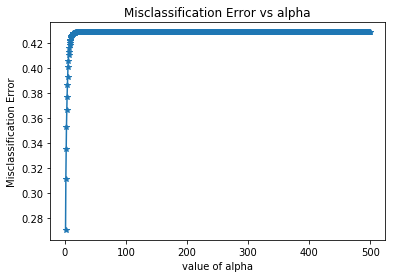

1.0

In [97]:
# To choosing optimal_alpha

optimal_alpha_tfidf = naive_bayes(X_train, y_train)
optimal_alpha_tfidf

In [98]:
# instantiate learning model alpha = optimal_alpha
nb_optimal = MultinomialNB(alpha = optimal_alpha_tfidf)

# fitting the model
nb_optimal.fit(X_train, y_train)
#knn_optimal.fit(bow_data, y_train)
    
# predict the response
pred = nb_optimal.predict(x_test)

In [99]:
tfidf_features = tf_idf_vect.get_feature_names()

In [100]:
# To count feature for each class while fitting the model
# Number of samples encountered for each (class, feature) during fitting

feat_count = nb_optimal.feature_count_
feat_count.shape

(2, 132201)

In [101]:
# Number of samples encountered for each class during fitting

nb_optimal.class_count_

array([2101., 2799.])

In [102]:
# Empirical log probability of features given a class(i.e. P(x_i|y))

log_prob = nb_optimal.feature_log_prob_
log_prob

array([[-11.9048042 , -11.9048042 , -11.82366776, ..., -11.78632876,
        -11.9048042 , -11.9048042 ],
       [-11.8704761 , -11.8704761 , -11.93074635, ..., -11.93074635,
        -11.84145578, -11.84145578]])

In [103]:
feature_prob = pd.DataFrame(log_prob, columns = tfidf_features)
feature_prob_tr = feature_prob.T
feature_prob_tr.shape


(132201, 2)

In [104]:
# To show top 10 feature from both class
print("Top 10 negative features:-\n",feature_prob_tr[0].sort_values(ascending = False)[0:10])
print("\n\n Top 10 positive features:-\n",feature_prob_tr[1].sort_values(ascending = False)[0:10])


Top 10 negative features:-
 tast      -8.132127
product   -8.236740
like      -8.244626
would     -8.538825
flavor    -8.548495
one       -8.605688
tri       -8.610071
coffe     -8.618248
buy       -8.690463
order     -8.798959
Name: 0, dtype: float64


 Top 10 positive features:-
 love     -7.937972
great    -7.962661
coffe    -8.037613
good     -8.157429
like     -8.159618
tast     -8.194379
flavor   -8.210641
dog      -8.326006
tea      -8.347894
use      -8.377850
Name: 1, dtype: float64


In [105]:
# Accuracy on train data
train_acc_tfidf = nb_optimal.score(X_train, y_train)
print("Train accuracy", train_acc_tfidf)

Train accuracy 0.9514285714285714


In [106]:
# Error on train data
train_err_tfidf = 1-train_acc_tfidf
print("Train Error %f%%" % (train_err_tfidf))

Train Error 0.048571%


In [107]:
# evaluate accuracy
acc_tfidf = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the naive bayes classifier for alpha = %d is %f%%' % (optimal_alpha_tfidf, acc_tfidf))


The accuracy of the naive bayes classifier for alpha = 1 is 71.380952%


In [108]:
#from sklearn.matrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[ 309,  590],
       [  11, 1190]])

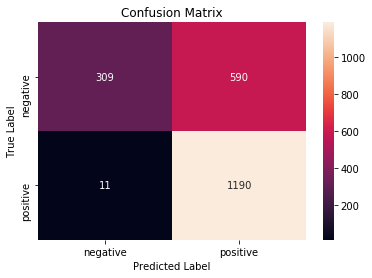

In [109]:
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

   negative       0.97      0.34      0.51       899
   positive       0.67      0.99      0.80      1201

avg / total       0.80      0.71      0.67      2100

